# Spam Email Classification Project

This project is focused on building a machine learning model to classify emails as **spam** or **ham** (not spam). We will be using various classifiers and comparing their performance to determine which model works best for this task.

## Step 1: Downloading the Dataset
We will download the email dataset from Kaggle.
```python

In [36]:
!kaggle datasets download -d mohinurabdurahimova/maildataset

Dataset URL: https://www.kaggle.com/datasets/mohinurabdurahimova/maildataset
License(s): copyright-authors
maildataset.zip: Skipping, found more recently modified local copy (use --force to force download)


## Step 2: Extracting the Dataset
We will unzip the dataset using the ZipFile library.



In [37]:
from zipfile import ZipFile
def zip_file(path):
  with ZipFile (path,'r') as p:
    p.extractall()
zip_file('/content/maildataset.zip')#extractall file

## Step 3: Importing Libraries
We will import the necessary libraries for data preprocessing, visualization, and model building.



In [38]:
#importing file
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize #split of data  :
from nltk.stem import PorterStemmer,SnowballStemmer,WordNetLemmatizer,LancasterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import  TfidfVectorizer
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as mse
from bs4 import BeautifulSoup# Remove HTML entities
import re
nltk.download('punkt')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_curve, roc_auc_score,confusion_matrix
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Step 4: Loading the Data
We will read the dataset using pandas.



In [39]:
#read data for csv
df=pd.read_csv('/content/mail_data.csv')

In [40]:
df.shape

(5572, 2)

In [41]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Step 5: Data Cleaning and Exploration
### 5.1 Checking Dataset Information
### Let's look at the structure of the data.



In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [43]:
df.describe(include=['object'])

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


## 5.2 Visualizing Missing Data
### We will visualize the missing data using missingno library.



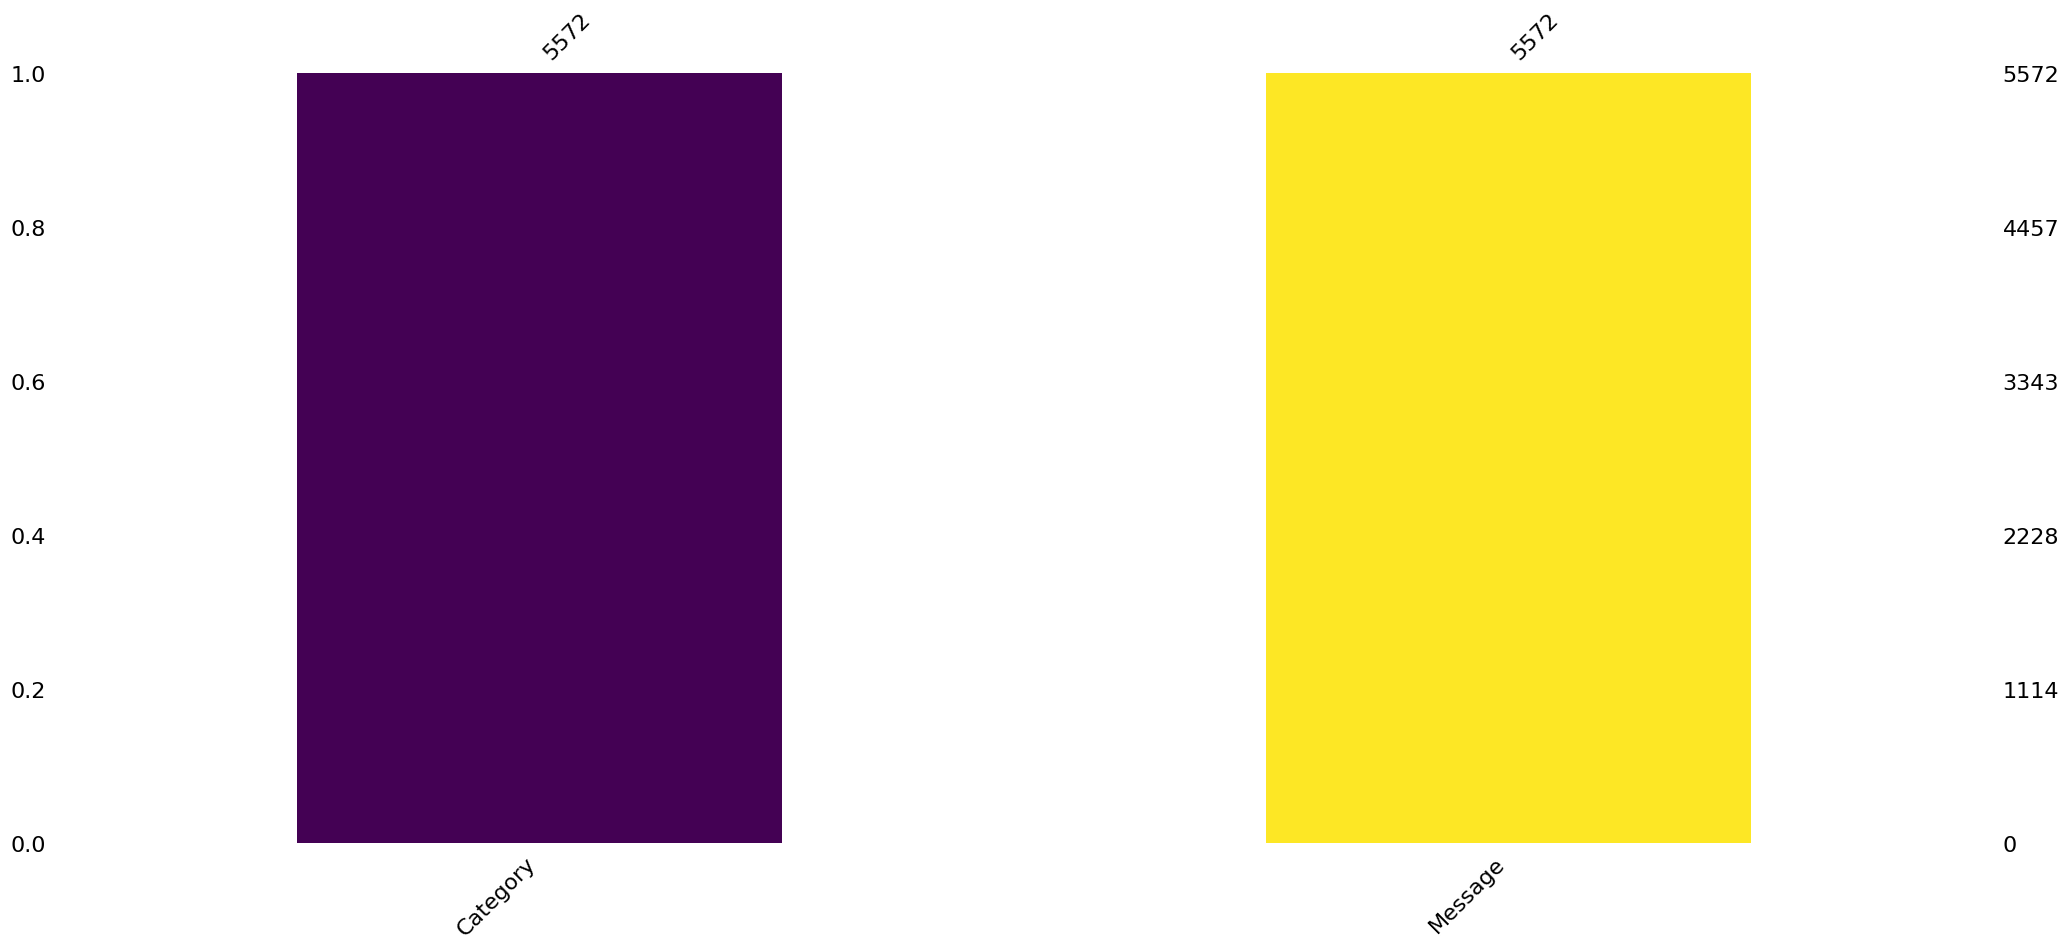

In [44]:
len_col=len(df.columns)
colores=plt.cm.viridis(np.linspace(0,1,len_col))
mse.bar(df,color=colores)
plt.show()

# 5.3 Visualizing Category Distribution
### We will visualize the distribution of email categories (spam/ham).



In [45]:
value_counts_category=round(df['Category'].value_counts()/len(df)*100,2)
value_counts_category=value_counts_category.reset_index()
def bar_plot(value_counts,col1,col2):
  fig=px.bar(value_counts,x=col1,y=col2,color=str(col1),
             title=f"value counts for {col1}".title()
             ,labels={'x': f"{col1}" , col2: 'Counts'},
      text=value_counts[col2].apply(lambda x : f"{x:.2f}%"),
      template='plotly_dark')
  fig.update_traces(
      textposition="outside",
      textfont={"size": 12, "family": "consolas"}
  )

  fig.update_layout(
      xaxis=dict(
          tickmode='linear',
          dtick=1
      )
  )

  return iplot(fig)
bar_plot(value_counts_category,'Category','count')

# Step 6: Text Preprocessing
### We will clean the email texts by removing HTML entities, converting to lowercase, removing stop words, and applying lemmatization.



In [46]:
nltk.download('wordnet')

def preprocessing_text(text):
  text=BeautifulSoup(text,"html.parser").get_text() # Remove HTML entities

  text=text.lower()

  text=re.sub(r'[^a-zA-Z\s]+','',text) # It removes non-alphabetic characters from df['Message'].

  tokens=word_tokenize(text)

  stop_words=set(stopwords.words('english'))

  tokens=[word for word  in tokens if word not in stop_words]

  stemming_Lemmatizer=WordNetLemmatizer()


  tokens=[stemming_Lemmatizer.lemmatize(word) for word in tokens]

  tokens=' '.join(tokens)

  return tokens





df['massage_1']=df['Message'].apply(lambda x :preprocessing_text(x) )

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Step 7: Word Cloud Visualization
### We will generate word clouds for spam and ham emails to visualize the most frequent words.



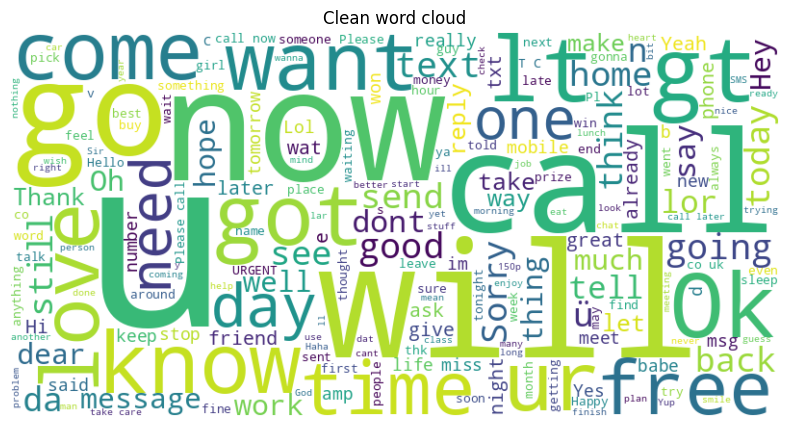

In [47]:
# Importing library
from wordcloud import WordCloud

# Concatenate all messages into a single text
all_text = ' '.join(df['Message'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.title("Clean word cloud")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

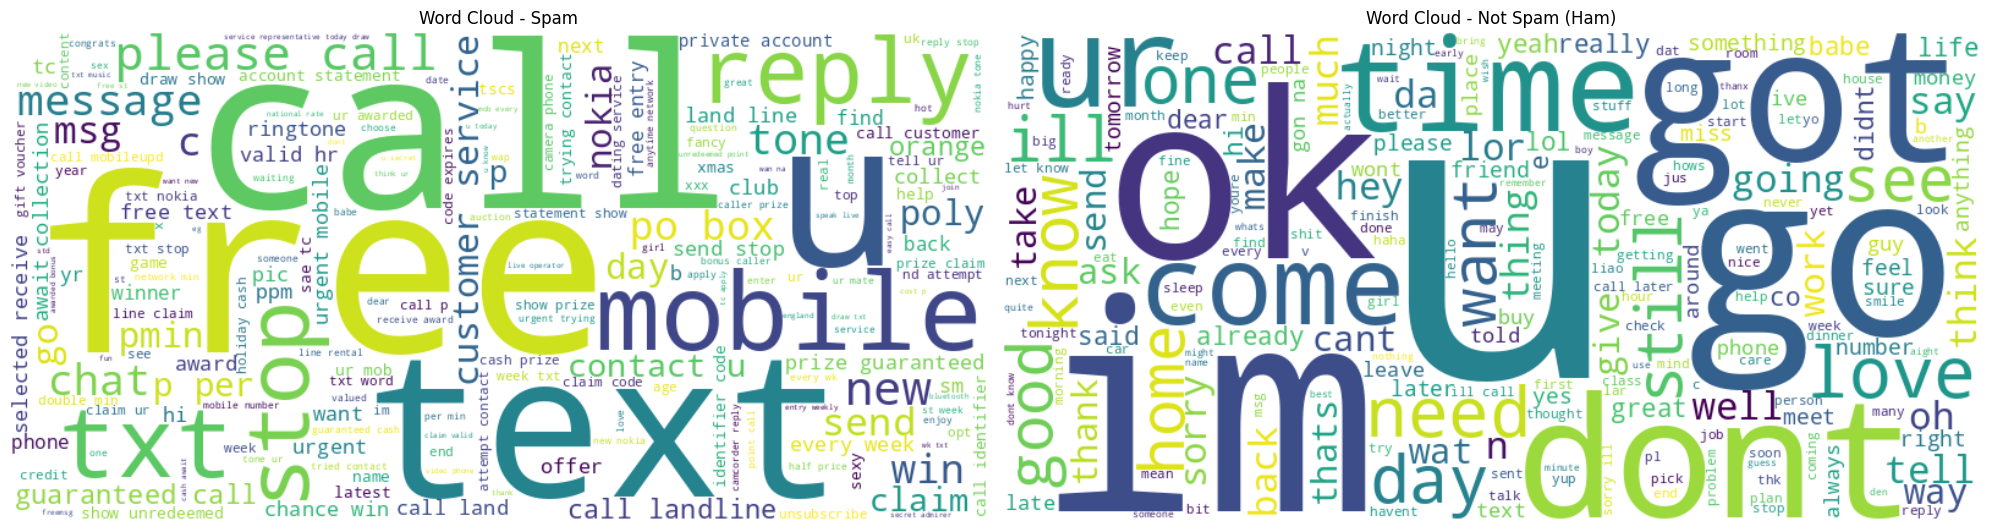

In [48]:
ham_email=df.loc[df['Category']=='ham','massage_1']
all_text_ham=' '.join(ham_email)
spam_email=df.loc[df['Category']=='spam','massage_1']
all_text_spam=' '.join(spam_email)
wordcloud_spam = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_text_spam)
wordcloud_ham=WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_text_ham)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud - Spam')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud - Not Spam (Ham)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 8: Label Encoding
### We will encode the target variable (Category) using LabelEncoder.



In [49]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
df['Category']=la.fit_transform(df['Category'])

In [50]:
x=df['massage_1']
y=df['Category']

# Step 9: Feature Extraction
### We will convert the processed text data into numerical features using TfidfVectorizer.



In [51]:
vectorizer=TfidfVectorizer()
x = vectorizer.fit_transform(df['massage_1'])


#Step 10: Train-Test Split
### We will split the data into training and testing sets.



In [52]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Viewing rows and columns
print("Viewing X_train rows and columns", X_train.shape)

# Viewing rows and columns
print("Viewing rows and columns y_train", y_train.shape)

Viewing X_train rows and columns (4457, 7935)
Viewing rows and columns y_train (4457,)


# Step 11: Model Training and Evaluation
### We will train multiple classifiers and evaluate their performance.



In [53]:

# Models to be evaluated
models = [MultinomialNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          SVC(random_state=42,probability=True),
          KNeighborsClassifier(n_neighbors=1, metric='manhattan'),
          GradientBoostingClassifier(random_state=42),
        XGBClassifier(random_state=42, tree_method='hist'),
        LGBMClassifier(
                            num_leaves=31,
                            max_depth=100,
                            learning_rate=0.1,
                            n_estimators=100)]

# Evaluate each model
for i, model in enumerate(models):
  model.fit(X_train,y_train)
  accuracy_score_train=model.score(X_train,y_train)
  accuracy_socre_test=model.score(X_test,y_test)
  print(model)
  print()
  print(f"Model {i+1}: {type(model).__name__}")
  print()
  print(f"Training Accuracy: {accuracy_score_train}")
  print(f"Testing Accuracy: {accuracy_socre_test}")
  print("------------------")


MultinomialNB()

Model 1: MultinomialNB

Training Accuracy: 0.97083239847431
Testing Accuracy: 0.968609865470852
------------------
DecisionTreeClassifier(random_state=42)

Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9641255605381166
------------------
KNeighborsClassifier()

Model 3: KNeighborsClassifier

Training Accuracy: 0.9225936728741306
Testing Accuracy: 0.9210762331838565
------------------
RandomForestClassifier(random_state=42)

Model 4: RandomForestClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9748878923766816
------------------
LogisticRegression(random_state=42)

Model 5: LogisticRegression

Training Accuracy: 0.9652232443347544
Testing Accuracy: 0.95695067264574
------------------
AdaBoostClassifier(random_state=42)

Model 6: AdaBoostClassifier

Training Accuracy: 0.9748709894547902
Testing Accuracy: 0.9668161434977578
------------------
SVC(probability=True, random_state=42)

Model 7: SVC

Training Accuracy: 0.9977563383441777
Tes

MultinomialNB()

Model 1: MultinomialNB

Training Accuracy: 0.97083239847431
Testing Accuracy: 0.968609865470852
------------------



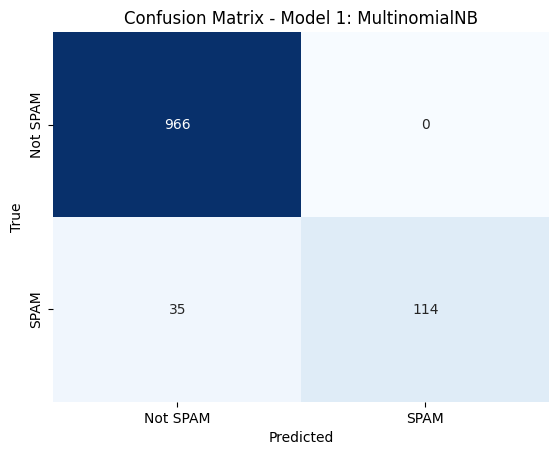

------------------
DecisionTreeClassifier(random_state=42)

Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9641255605381166
------------------



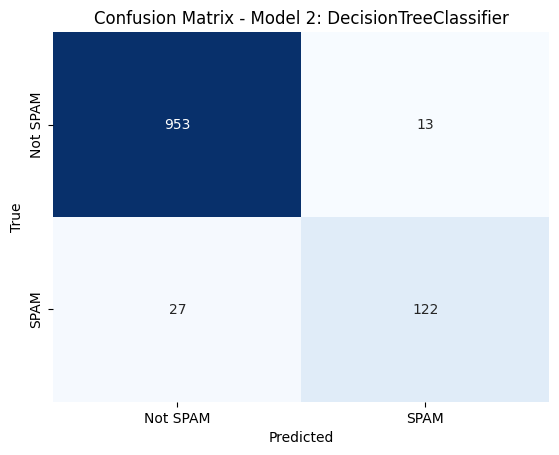

------------------
KNeighborsClassifier()

Model 3: KNeighborsClassifier

Training Accuracy: 0.9225936728741306
Testing Accuracy: 0.9210762331838565
------------------



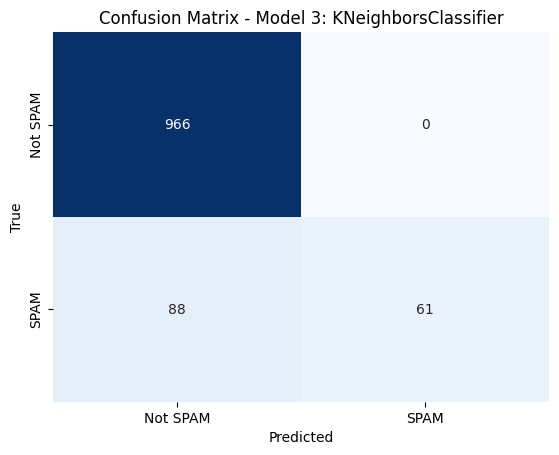

------------------
RandomForestClassifier(random_state=42)

Model 4: RandomForestClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9748878923766816
------------------



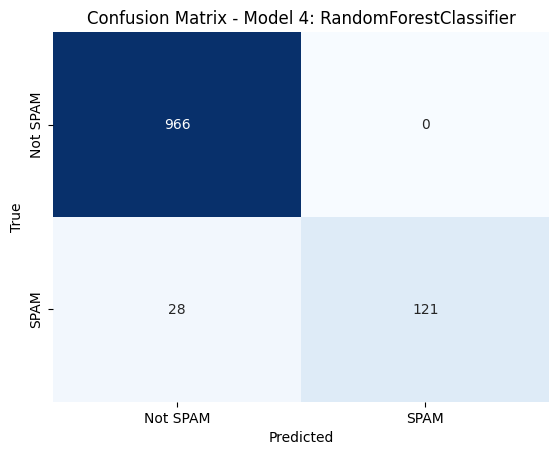

------------------
LogisticRegression(random_state=42)

Model 5: LogisticRegression

Training Accuracy: 0.9652232443347544
Testing Accuracy: 0.95695067264574
------------------



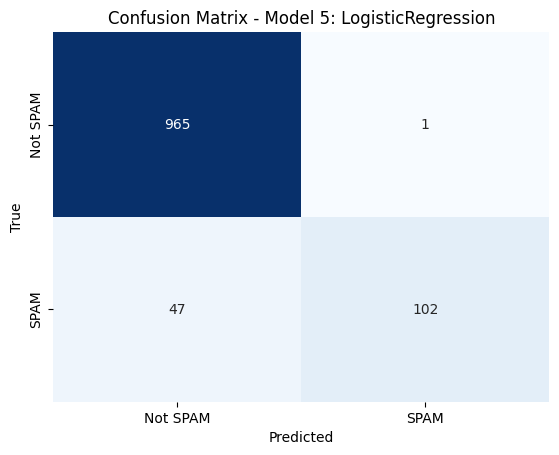

------------------
AdaBoostClassifier(random_state=42)

Model 6: AdaBoostClassifier

Training Accuracy: 0.9748709894547902
Testing Accuracy: 0.9668161434977578
------------------



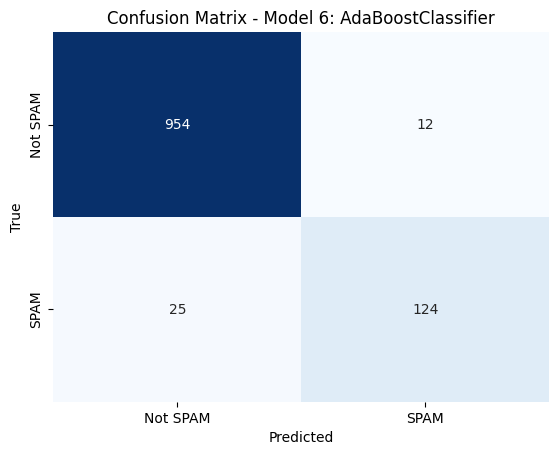

------------------
SVC(probability=True, random_state=42)

Model 7: SVC

Training Accuracy: 0.9977563383441777
Testing Accuracy: 0.9757847533632287
------------------



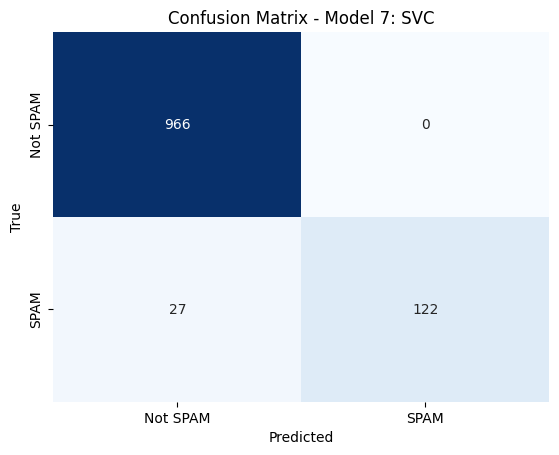

------------------
KNeighborsClassifier(metric='manhattan', n_neighbors=1)

Model 8: KNeighborsClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9515695067264573
------------------



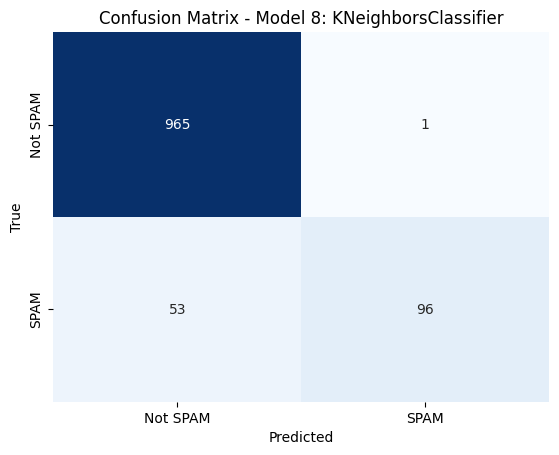

------------------
GradientBoostingClassifier(random_state=42)

Model 9: GradientBoostingClassifier

Training Accuracy: 0.9759928202827014
Testing Accuracy: 0.9650224215246637
------------------



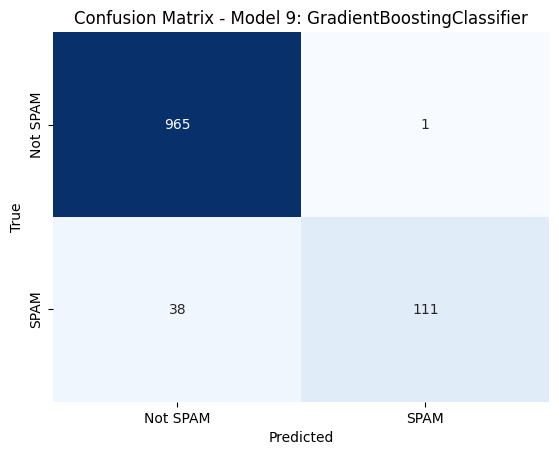

------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Model 10: XGBClassifier

Training Accuracy: 0.9890060578864707
Testing Accuracy: 0.9721973094170404
------------------



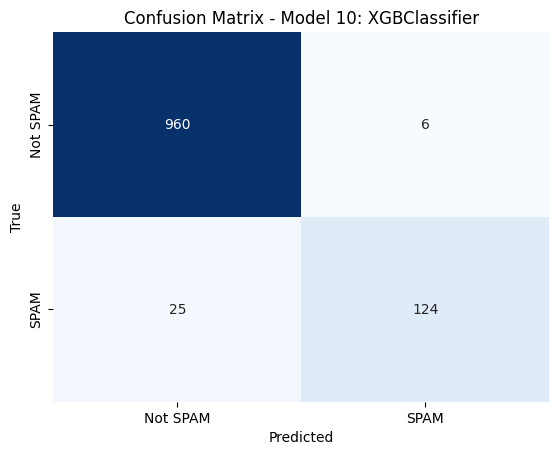

------------------
[LightGBM] [Info] Number of positive: 598, number of negative: 3859
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6702
[LightGBM] [Info] Number of data points in the train set: 4457, number of used features: 364
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.134171 -> initscore=-1.864573
[LightGBM] [Info] Start training from score -1.864573
LGBMClassifier(max_depth=100)

Model 11: LGBMClassifier

Training Accuracy: 0.9966345075162666
Testing Accuracy: 0.9730941704035875
------------------



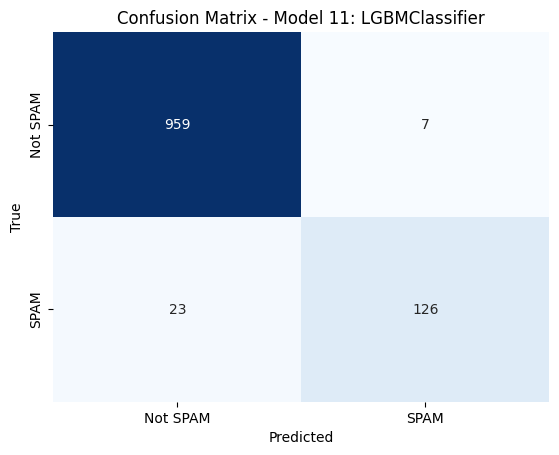

------------------


In [54]:
# Evaluate each model use confusion_matrix
for i ,model in enumerate(models):
  model.fit(X_train,y_train)
  accuracy_score_train=accuracy_score(y_train,model.predict(X_train))
  accuracy_score_test=accuracy_score(y_test,model.predict(X_test))
  print(model)
  print()
  print(f"Model {i+1}: {type(model).__name__}")
  print()
  print(f"Training Accuracy: {accuracy_score_train}")
  print(f"Testing Accuracy: {accuracy_score_test}")
  print("------------------")
  print()
  confusion_matrix_=confusion_matrix(y_test,model.predict(X_test))
  plt.figure()
  sns.heatmap(confusion_matrix_, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Not SPAM", "SPAM"],
                yticklabels=["Not SPAM", "SPAM"])
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
  plt.show()
  print("------------------")


In [55]:
for i ,model in enumerate(models):
  model.fit(X_train,y_train)
  accuracy_score_train=accuracy_score(y_train,model.predict(X_train))
  accuracy_score_test=accuracy_score(y_test,model.predict(X_test))
  print(model)
  print()
  print(f"Model {i+1}: {type(model).__name__}")
  print()
  print(f"Training Accuracy: {accuracy_score_train}")
  print(f"Testing Accuracy: {accuracy_score_test}")
  print("------------------")
  print()
  print(classification_report(y_test,model.predict(X_test)))
  print("------------------")

MultinomialNB()

Model 1: MultinomialNB

Training Accuracy: 0.97083239847431
Testing Accuracy: 0.968609865470852
------------------

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

------------------
DecisionTreeClassifier(random_state=42)

Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9641255605381166
------------------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.90      0.82      0.86       149

    accuracy                           0.96      1115
   macro avg       0.94      0.90      0.92      1115
weighted avg       0.96      0.96      0.96      1115

------------------
KNeighborsClassifier(

Model 1: MultinomialNB
Training Accuracy: 0.97083239847431
Testing Accuracy: 0.968609865470852


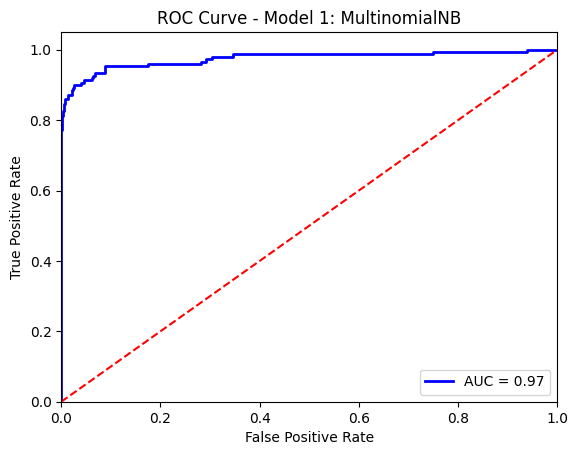

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9641255605381166


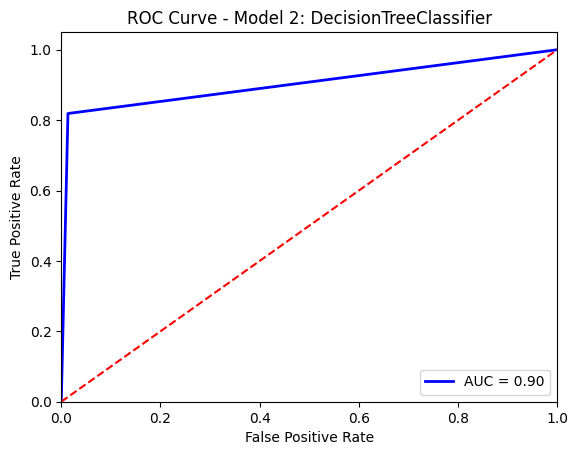

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.9225936728741306
Testing Accuracy: 0.9210762331838565


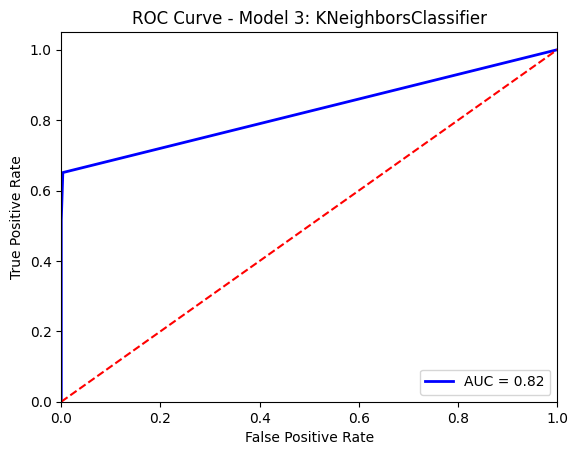

------------------
Model 4: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9748878923766816


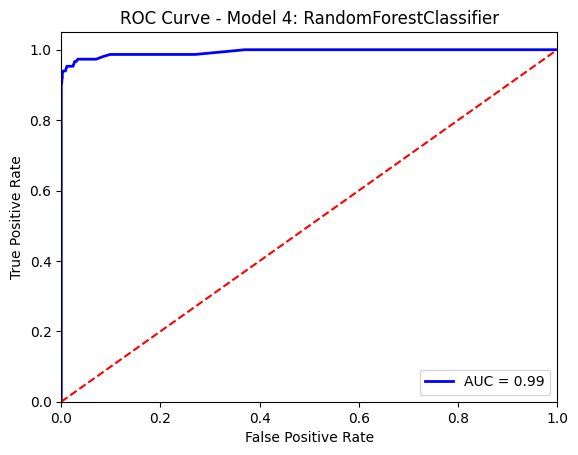

------------------
Model 5: LogisticRegression
Training Accuracy: 0.9652232443347544
Testing Accuracy: 0.95695067264574


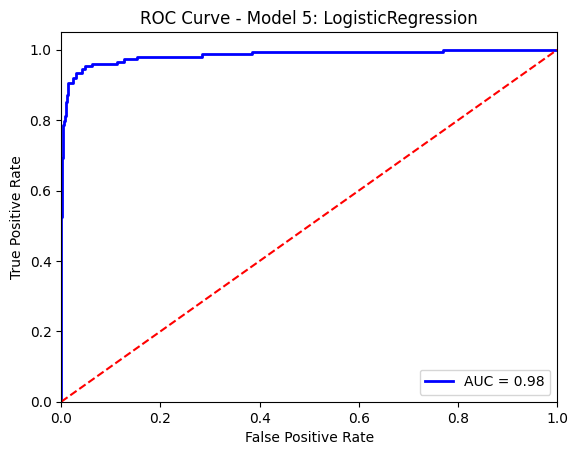

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.9748709894547902
Testing Accuracy: 0.9668161434977578


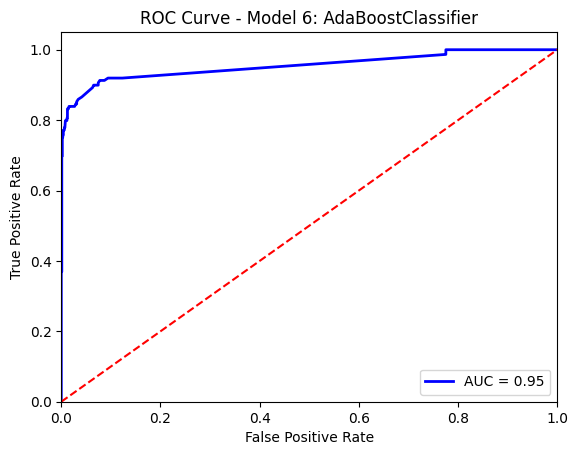

------------------
Model 7: SVC
Training Accuracy: 0.9977563383441777
Testing Accuracy: 0.9757847533632287


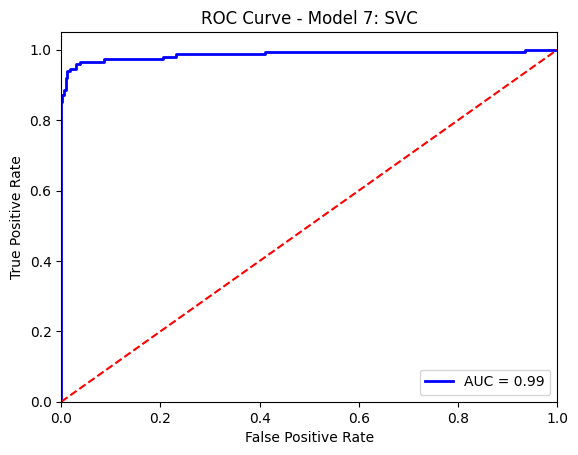

------------------
Model 8: KNeighborsClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9515695067264573


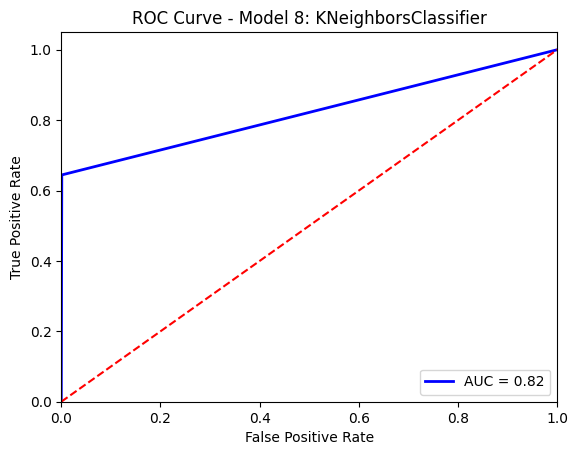

------------------
Model 9: GradientBoostingClassifier
Training Accuracy: 0.9759928202827014
Testing Accuracy: 0.9650224215246637


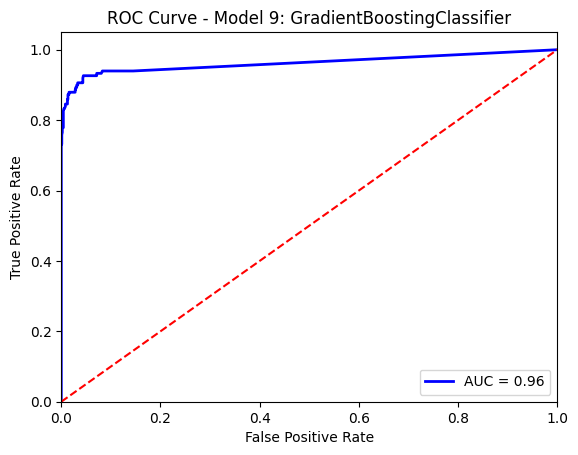

------------------
Model 10: XGBClassifier
Training Accuracy: 0.9890060578864707
Testing Accuracy: 0.9721973094170404


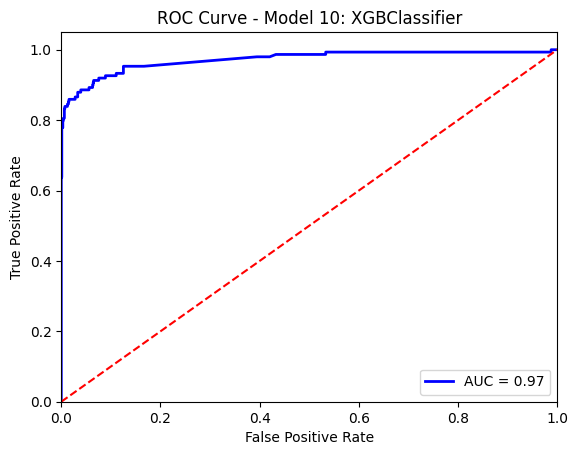

------------------
[LightGBM] [Info] Number of positive: 598, number of negative: 3859
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6702
[LightGBM] [Info] Number of data points in the train set: 4457, number of used features: 364
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.134171 -> initscore=-1.864573
[LightGBM] [Info] Start training from score -1.864573
Model 11: LGBMClassifier
Training Accuracy: 0.9966345075162666
Testing Accuracy: 0.9730941704035875


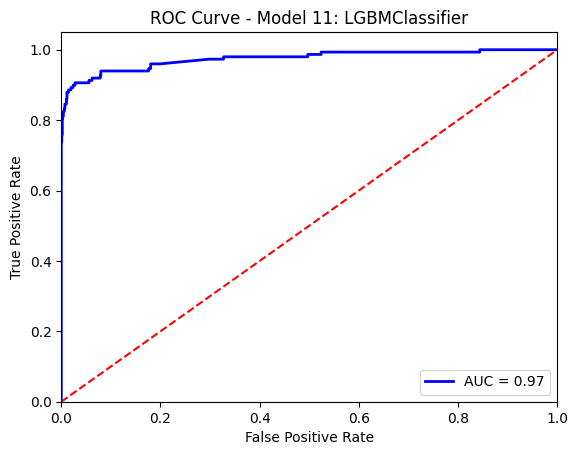

------------------


In [56]:
# Evaluate each model use roc_curev
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    y_probs=model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_probs)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model {i+1}: {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()

    print("------------------")


In [57]:
result_list=[]
for model in (models):
  model.fit(X_train,y_train)
  train_accuracy = accuracy_score(y_train, model.predict(X_train))
  test_accuracy = accuracy_score(y_test, model.predict(X_test))
  report=classification_report(y_test,model.predict(X_test),output_dict=True)
  result = {
        'name_model': type(model).__name__,
        'accuracy_test': test_accuracy,
        'accuracy_train': train_accuracy,
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-score': report['macro avg']['f1-score'],
        'Support': report['macro avg']['support']
    }

  result_list.append(result)

[LightGBM] [Info] Number of positive: 598, number of negative: 3859
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6702
[LightGBM] [Info] Number of data points in the train set: 4457, number of used features: 364
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.134171 -> initscore=-1.864573
[LightGBM] [Info] Start training from score -1.864573


In [58]:
result_frame=pd.DataFrame(result_list).sort_values(by='accuracy_test',ascending=False)
result_frame

,name_model,accuracy_test,accuracy_train,Precision,Recall,F1-score,Support
6,SVC,0.975785,0.997756,0.986405,0.909396,0.943293,1115.0
3,RandomForestClassifier,0.974888,1.000000,0.985915,0.906040,0.941005,1115.0
10,LGBMClassifier,0.973094,0.996635,0.961973,0.919196,0.939108,1115.0
9,XGBClassifier,0.972197,0.989006,0.964233,0.913002,0.936500,1115.0
0,MultinomialNB,0.968610,0.970832,0.982517,0.882550,0.924563,1115.0
5,AdaBoostClassifier,0.966816,0.974871,0.943114,0.909896,0.925576,1115.0
8,GradientBoostingClassifier,0.965022,0.975993,0.976593,0.871966,0.915384,1115.0
1,DecisionTreeClassifier,0.964126,1.000000,0.938076,0.902667,0.919300,1115.0
4,LogisticRegression,0.956951,0.965223,0.971924,0.841764,0.892628,1115.0
7,KNeighborsClassifier,0.951570,1.000000,0.968814,0.821630,0.876635,1115.0


# Step 12: Pipeline and Final Prediction
###We will build a pipeline with TfidfVectorizer and SVC classifier to predict a new email.



In [59]:
svc= SVC(random_state=42,probability=True)
X_train, X_test, y_train, y_test = train_test_split(df['massage_1'], y, test_size=0.2, random_state=42)
# Create pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),          # TF-IDF vectorization
    ('classifier', SVC(random_state=42, probability=True))  # Classifier
])

# Fit the model
pipeline.fit(X_train, y_train)

def predict(text):
  processed_text=preprocessing_text(text)
  predict=pipeline.predict([processed_text])
  return la.inverse_transform(predict)[0]

new_message = """Nice and well organized notebook…if you want u can check my notebook and give your feedback…"""
reuslt=predict(new_message)
if reuslt=='spam':
  print(f"{new_message} : {reuslt.upper()}")
else:
    print(f"{new_message} : {reuslt.upper()}")


Nice and well organized notebook…if you want u can check my notebook and give your feedback… : HAM
